# Importing Libraries😊😊

In [1]:
import pretty_midi
import librosa
import matplotlib.pyplot as plt
import numpy as np
import random


# Converting MIDI to Spectrogram 🎶📈

In [2]:
def midi_to_spectrogram(midi_path, sr=22050):
  """
  Creates spectrograms (STFT and CQT) from a MIDI file.

  Args:
      midi_path: Path to the MIDI file.
      sr: Sample rate (default: 22050 Hz).

  Returns:
      A tuple containing:
          - spectrogram_stft (STFT spectrogram)
          - spectrogram_cqt (CQT spectrogram)
          - frequencies_stft (STFT frequencies)
          - frequencies_cqt (CQT frequencies)
  """
  try:
    # Convert MIDI to audio using pretty_midi
    pm = pretty_midi.PrettyMIDI(midi_path)
    audio_data = pm.synthesize()
    window_size = 1024
    hop_length = 512


    # Constant-Q Transform (CQT)
    n_bins = 84
    bins_per_octave = 12
    C = librosa.cqt(audio_data, sr=sr, hop_length=hop_length, n_bins=n_bins, bins_per_octave=bins_per_octave)
    spectrogram_cqt = np.abs(C)
    frequencies_cqt = librosa.cqt_frequencies(n_bins, fmin=librosa.core.midi_to_hz(24), bins_per_octave=bins_per_octave)

    return spectrogram_cqt, frequencies_cqt, audio_data, hop_length,sr

  except Exception as e:
    print(f"Error converting MIDI to spectrogram: {e}")
    return None, None, None, None


In [3]:
midi_path = "/content/maestro-v3.0.0_2011_MIDI-Unprocessed_02_R1_2011_MID--AUDIO_R1-D1_08_Track08_wav.midi"
spectrogram_cqt, frequencies_cqt , audio_data, hop_length,sr= midi_to_spectrogram(midi_path)


In [4]:
print(sr)

22050


# Spectrogram Visualization

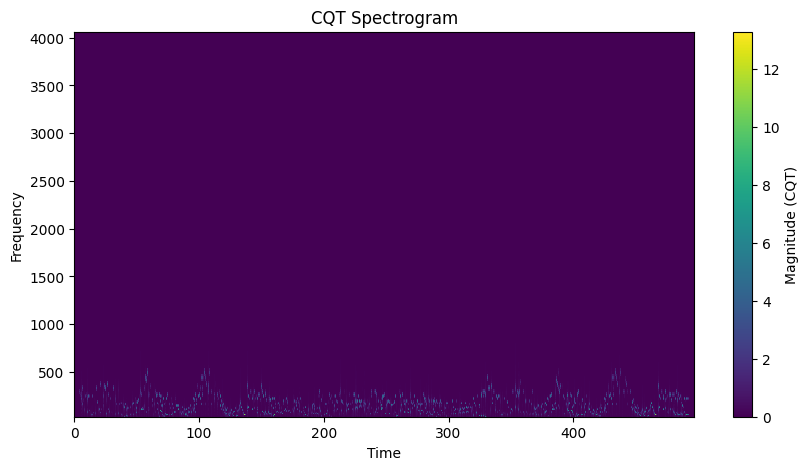

In [5]:

if spectrogram_cqt is not None:
  t = np.arange(0, len(audio_data), hop_length) * (1.0 / sr)

  # Plot CQT spectrogram
  plt.figure(figsize=(10, 5))
  plt.pcolormesh(t, frequencies_cqt, spectrogram_cqt, shading="auto")
  plt.colorbar(label="Magnitude (CQT)")
  plt.ylabel("Frequency")
  plt.xlabel("Time")
  plt.title("CQT Spectrogram")
  plt.show()

# Spliting spectogram and MIDI

In [6]:
if len(spectrogram_cqt) == 0:
  print("Error: Spectrogram is empty. Cannot select random windows.")
else :
  print("continue")


continue


In [16]:
# Split spectrogram into 1/8th of a second windows
window_size = int(sr / 8)
num_windows = len(spectrogram_cqt) // window_size
spectrogram_windows = [spectrogram_cqt[i * window_size:(i + 1) * window_size] for i in range(num_windows)]

# Split MIDI file into 1/8th of a second segments
pm = pretty_midi.PrettyMIDI(midi_path)
midi_windows = []
for note in pm.instruments[0].notes:
  start_time = note.start
  end_time = note.end
  window_idx = int(start_time * sr / window_size)
  if window_idx < num_windows:
    midi_windows.append(note)

print("Spectrograms and Midi files successfully splitted")

Spectrograms and Midi files successfully splitted


In [17]:

# Print 10 spectrogram and corresponding MIDI parts
for i in range(10):
  plt.figure()
  plt.pcolormesh(spectrogram_windows[i], shading="auto")
  plt.title(f"Spectrogram Window {i + 1}")
  plt.show()

  print(f"MIDI notes in window {i + 1}:")
  for note in midi_windows[i]:
    print(f"  - Note: {note.pitch}, Start: {note.start}, End: {note.end}")

IndexError: list index out of range

<Figure size 640x480 with 0 Axes>